In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading train and test dataset
(train_images,train_labels),(test_images,test_labels)=keras.datasets.cifar10.load_data()

In [4]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
categories=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

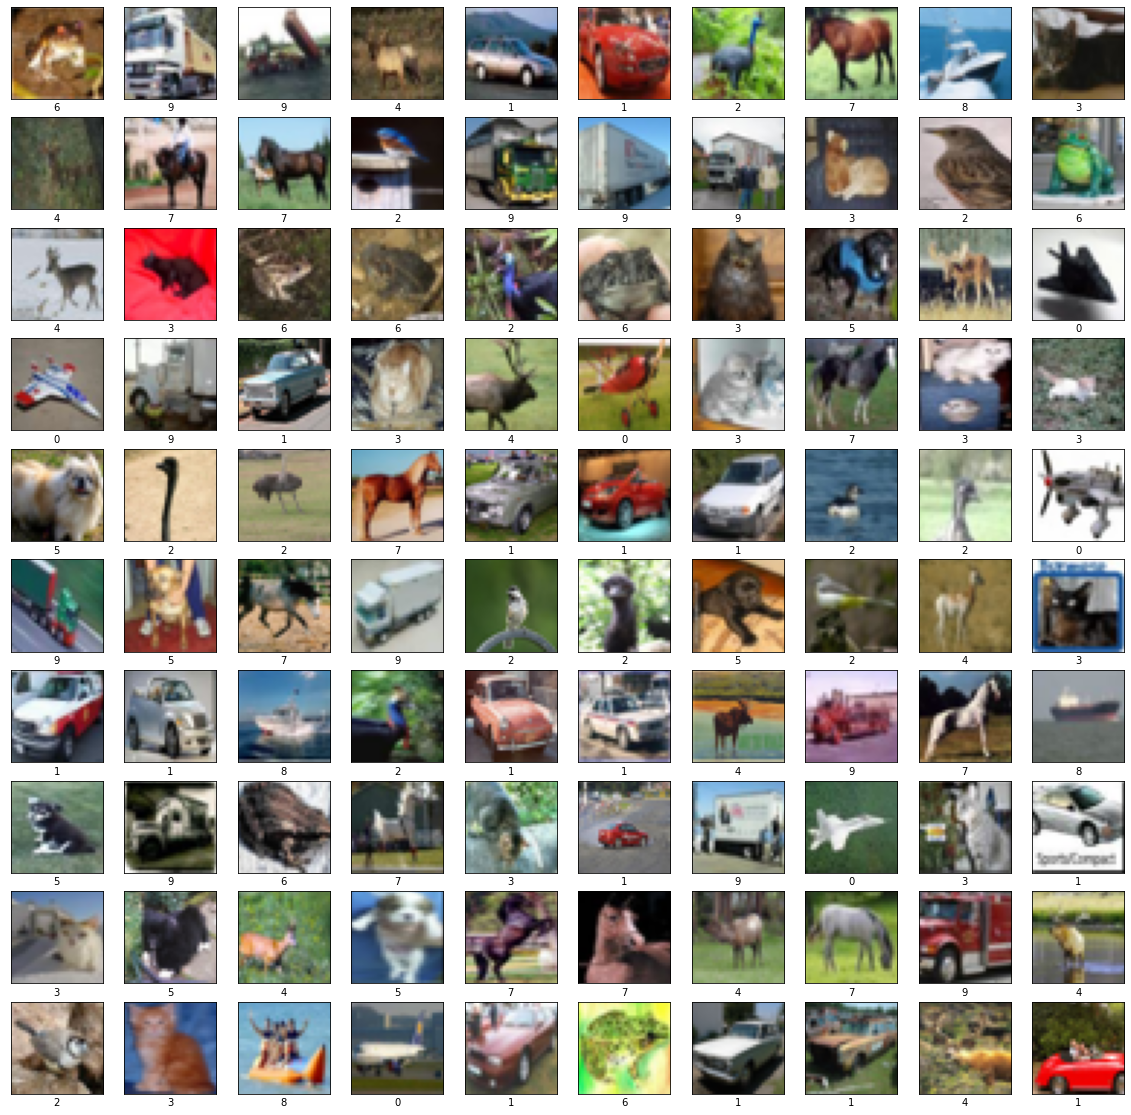

In [11]:
plt.figure(figsize=(20,20))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(train_images[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(train_labels[i][0])
plt.show()

In [12]:
# defining cnn model
model=keras.Sequential([
                        
                        keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
                        keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
                        keras.layers.MaxPooling2D((2, 2)),
                        keras.layers.Dropout(0.2),
                        keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
                        keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
                        keras.layers.MaxPooling2D((2, 2)),
                        keras.layers.Dropout(0.2),
                        keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
                        keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
                        keras.layers.MaxPooling2D((2, 2)),
                        keras.layers.Dropout(0.2),

                        
                        keras.layers.Flatten(),
                        keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
                        keras.layers.Dropout(0.2),
                        keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [7]:

# compiling model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics='accuracy'
)


In [8]:
# normalizing to range 0-1
train_images_norm=train_images.astype('float32')/255
test_images_norm=test_images.astype('float32')/255

In [9]:
h=model.fit(x=train_images_norm,y=train_labels,epochs=20,batch_size=64, validation_data=(test_images_norm, test_labels))

Epoch 1/20
782/782 [==============================] - 387s 492ms/step - loss: 1.6438 - accuracy: 0.3931 - val_loss: 1.1688 - val_accuracy: 0.5816
Epoch 2/20
782/782 [==============================] - 384s 491ms/step - loss: 1.1478 - accuracy: 0.5913 - val_loss: 0.9203 - val_accuracy: 0.6746
Epoch 3/20
782/782 [==============================] - 384s 491ms/step - loss: 0.9536 - accuracy: 0.6654 - val_loss: 0.8794 - val_accuracy: 0.6902
Epoch 4/20
782/782 [==============================] - 388s 496ms/step - loss: 0.8353 - accuracy: 0.7079 - val_loss: 0.7491 - val_accuracy: 0.7378
Epoch 5/20
782/782 [==============================] - 384s 491ms/step - loss: 0.7497 - accuracy: 0.7390 - val_loss: 0.6756 - val_accuracy: 0.7692
Epoch 6/20
782/782 [==============================] - 384s 491ms/step - loss: 0.6904 - accuracy: 0.7590 - val_loss: 0.6738 - val_accuracy: 0.7644
Epoch 7/20
782/782 [==============================] - 381s 487ms/step - loss: 0.6476 - accuracy: 0.7752 - val_loss: 0.6698 -

In [10]:
# evaluating model
_, acc = model.evaluate(test_images_norm, test_labels)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 19s 61ms/step - loss: 0.6896 - accuracy: 0.7882
> 78.820
